<a href="https://colab.research.google.com/github/Faseeh56/Public-Transport-Route-Performance-Analysis/blob/main/Public_Transport_Route_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Dataset**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/CSV's/transport_routes.csv")
df.head()

,Route_ID,City,Time_Slot,Passenger_Count,Scheduled_Time_Min,Actual_Time_Min,Delay_Minutes
0,R113,Islamabad,Morning,93,52,68,16
1,R115,Lahore,Morning,182,36,58,22
2,R101,Lahore,Afternoon,74,50,66,16
3,R111,Islamabad,Morning,113,67,90,23
4,R109,Islamabad,Afternoon,111,31,42,11


**Dataset Overview**

In [4]:
df.shape

(220, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Route_ID            220 non-null    object
 1   City                220 non-null    object
 2   Time_Slot           220 non-null    object
 3   Passenger_Count     220 non-null    int64 
 4   Scheduled_Time_Min  220 non-null    int64 
 5   Actual_Time_Min     220 non-null    int64 
 6   Delay_Minutes       220 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 12.2+ KB


In [6]:
df.describe()

,Passenger_Count,Scheduled_Time_Min,Actual_Time_Min,Delay_Minutes
count,220.000000,220.000000,220.000000,220.000000
mean,129.936364,49.822727,61.118182,11.404545
std,54.319666,11.802423,13.422010,7.792689
min,41.000000,30.000000,31.000000,0.000000
25%,85.750000,39.000000,52.000000,5.000000
50%,126.000000,50.000000,60.500000,11.000000
75%,176.000000,60.000000,70.000000,18.000000
max,219.000000,69.000000,93.000000,24.000000


**Passenger Demand by City**

In [12]:
city_passengers = df.groupby('City')['Passenger_Count'].sum().sort_values(ascending=False)
city_passengers

,Passenger_Count
City,
Karachi,4298
Islamabad,4154
Peshawar,4005
Lahore,3972
Faisalabad,3623
Rawalpindi,3587
Quetta,2751
Multan,2196


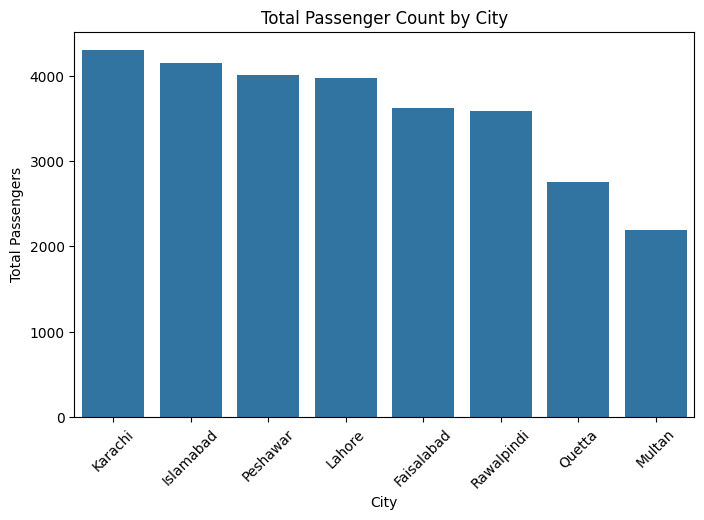

In [10]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_passengers.index, y=city_passengers.values)
plt.title("Total Passenger Count by City")
plt.xlabel("City")
plt.ylabel("Total Passengers")
plt.xticks(rotation=45)
plt.show()


**Passenger Demand by Time Slot**

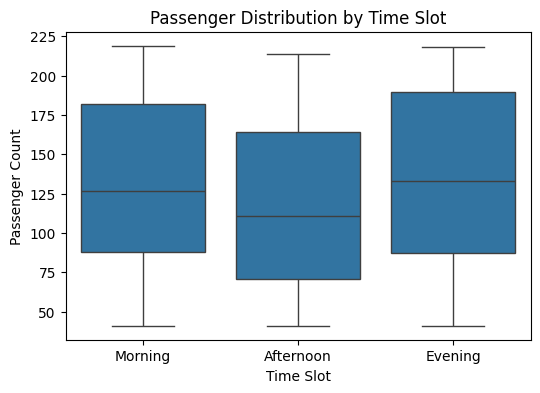

In [13]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Time_Slot', y='Passenger_Count',
            order=['Morning', 'Afternoon', 'Evening'])
plt.title("Passenger Distribution by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Passenger Count")
plt.show()


**Most Crowded Routes**

In [14]:
route_demand = df.groupby('Route_ID')['Passenger_Count'].mean().sort_values(ascending=False)
route_demand

,Passenger_Count
Route_ID,
R113,165.800000
R114,161.454545
R102,146.000000
R108,145.777778
R117,138.833333
R104,135.000000
R109,133.363636
R111,131.250000
R110,130.857143


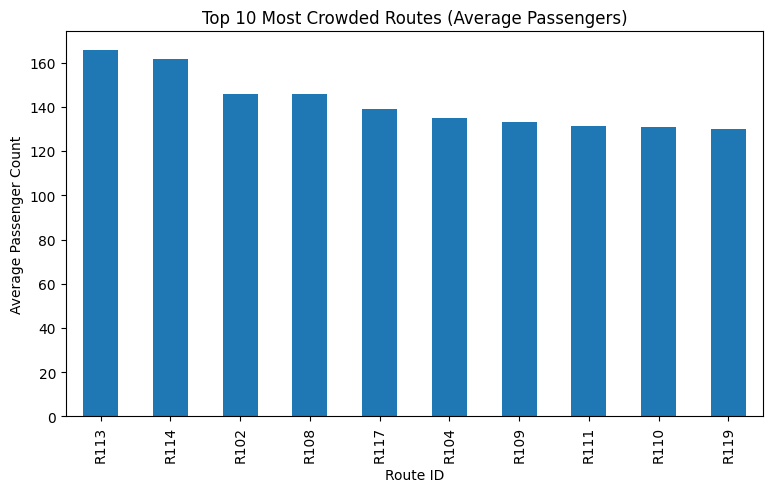

In [17]:
plt.figure(figsize=(9,5))
route_demand.head(10).plot(kind='bar')
plt.title("Top 10 Most Crowded Routes (Average Passengers)")
plt.xlabel("Route ID")
plt.ylabel("Average Passenger Count")
plt.show()


**Delay Analysis by City**

In [18]:
city_delay = df.groupby('City')['Delay_Minutes'].mean().sort_values(ascending=False)
city_delay

,Delay_Minutes
City,
Rawalpindi,13.724138
Lahore,12.692308
Islamabad,11.823529
Karachi,11.531250
Peshawar,11.103448
Multan,10.944444
Faisalabad,10.896552
Quetta,7.608696


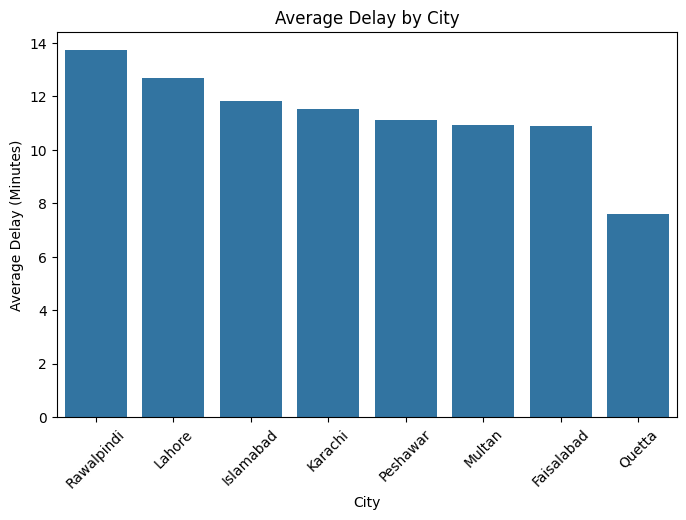

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(x=city_delay.index, y=city_delay.values)
plt.title("Average Delay by City")
plt.xlabel("City")
plt.ylabel("Average Delay (Minutes)")
plt.xticks(rotation=45)
plt.show()


**Delay by Time Slot**

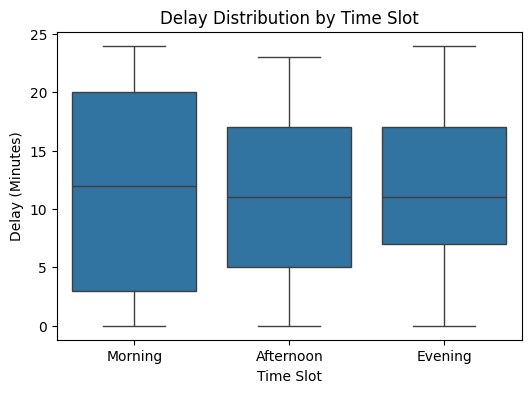

In [20]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Time_Slot', y='Delay_Minutes',
            order=['Morning', 'Afternoon', 'Evening'])
plt.title("Delay Distribution by Time Slot")
plt.xlabel("Time Slot")
plt.ylabel("Delay (Minutes)")
plt.show()


**Route Efficiency Analysis**

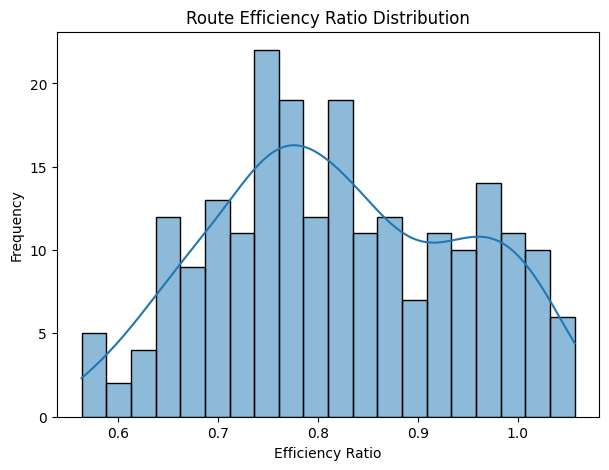

In [21]:
df['Efficiency_Ratio'] = df['Scheduled_Time_Min'] / df['Actual_Time_Min']

plt.figure(figsize=(7,5))
sns.histplot(df['Efficiency_Ratio'], bins=20, kde=True)
plt.title("Route Efficiency Ratio Distribution")
plt.xlabel("Efficiency Ratio")
plt.ylabel("Frequency")
plt.show()


**Correlation Between Passengers & Delay**

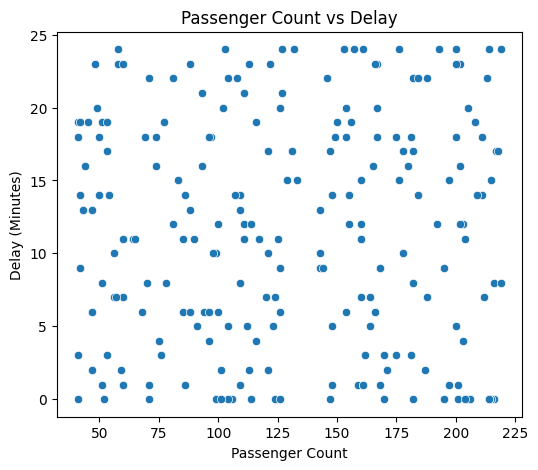

In [22]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='Passenger_Count', y='Delay_Minutes')
plt.title("Passenger Count vs Delay")
plt.xlabel("Passenger Count")
plt.ylabel("Delay (Minutes)")
plt.show()


**Key Insights:**
1. Major cities handle the highest passenger volume, indicating higher transport demand.
2. Morning and evening time slots experience maximum passenger congestion.
3. Certain routes consistently carry higher passenger loads and may require more buses.
4. Delays are more frequent during peak hours due to traffic congestion.
5. Routes with higher passenger counts tend to experience higher delays.


**Recommendations:**
1. Increase bus frequency on high-demand routes during peak hours.
2. Optimize schedules for routes with frequent delays.
3. Deploy traffic management measures during morning and evening rush hours.
4. Introduce express or limited-stop services for overcrowded routes.
5. Use real-time monitoring to reduce delays and improve service reliability.
